In [1]:
import colorednoise as cn
import allantools
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def Rn(x, K):
    N = len(x)
    M = int((N/K))
    R = np.array([])
    for n in range(0,M):
        R = np.append(R, np.mean(x[n*K:n*K+K]))
    return R

def adev(x, K):
    N = len(x)
    M = int((N/K))
    R = np.array([])
    for n in range(0,M):
        R = np.append(R, np.mean(x[n*K:n*K+K]))
    ad = (1/(2*M))*np.mean(np.diff(R,n=1)**2)
    return ad

def adev_array(y):
    adev_array = np.array([])
    
    L = int(len(y))
    maxM = 2**np.floor(np.log2(L/2))
    m = np.logspace(np.log10(1), np.log10(maxM), 200)
    K_span = np.ceil(m).astype(int)   
#     K_span = np.arange(1,int(len(y)/2),2)
    for K in K_span:
        adev_array = np.append(adev_array, adev(y,K))
    return K_span, adev_array

In [4]:
data = np.load("data_matrix.npy")
data = data[:,1:-1]

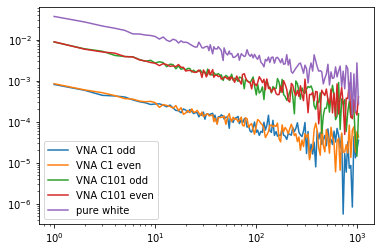

In [6]:
plt.figure()

y = np.abs(data[2,2501:-1:5])*1000
y = np.diff(y)
K_span, adevs = adev_array(y)
plt.loglog(K_span, np.sqrt(adevs), label="VNA C1 odd")

y = np.abs(data[2,2500:-1:5])*1000
y = np.diff(y)
K_span, adevs = adev_array(y)
plt.loglog(K_span, np.sqrt(adevs), label="VNA C1 even")

y = np.abs(data[-1,2501:-1:5])*1000
y = np.diff(y)
K_span, adevs = adev_array(y)
plt.loglog(K_span, np.sqrt(adevs), label="VNA C101 odd")

y = np.abs(data[-1,2500:-1:5])*1000
y = np.diff(y)
K_span, adevs = adev_array(y)
plt.loglog(K_span, np.sqrt(adevs), label="VNA C101 even")

y = np.random.normal(0,1,len(y)) 
y = np.diff(y)
K_span, adevs = adev_array(y)
plt.loglog(K_span, np.sqrt(adevs), label="pure white")

# beta = 2 # the exponent
# y = cn.powerlaw_psd_gaussian(beta, 1000)
# K_span, adevs = adev_array(y)
# plt.loglog(K_span, np.sqrt(adevs), label="test CN")

# y = allantools.noise.pink(1000)
# K_span, adevs = adev_array(y)
# plt.loglog(K_span, np.sqrt(adevs), label="pink")

# y = allantools.noise.brown(1000) 
# K_span, adevs = adev_array(y)
# plt.loglog(K_span, np.sqrt(adevs), label="brown")

# t = np.linspace(0,10,1000)
# y = np.random.normal(t,1,len(t)) 
# K_span, adevs = adev_array(y)
# plt.loglog(K_span, np.sqrt(adevs), label="white+drift")

plt.legend(loc='best')

(101, 13575)